<a href="https://colab.research.google.com/github/victor555ops/IA-Python/blob/main/clasificador_de_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

#Descargar set de datos de MNIST (Numeros escritos a mano, etiquetados)
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)

#Obtener en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

#Funcion de normalizacion para los datos (Pasar valor de los pixeles de 0-255 a 0-1)
#(Hace que la red aprenda mejor y mas rapido)
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui se pasa de 0-255 a 0-1
  return imagenes, etiquetas

#Normalizar los datos de entrenamiento con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar a cache (usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


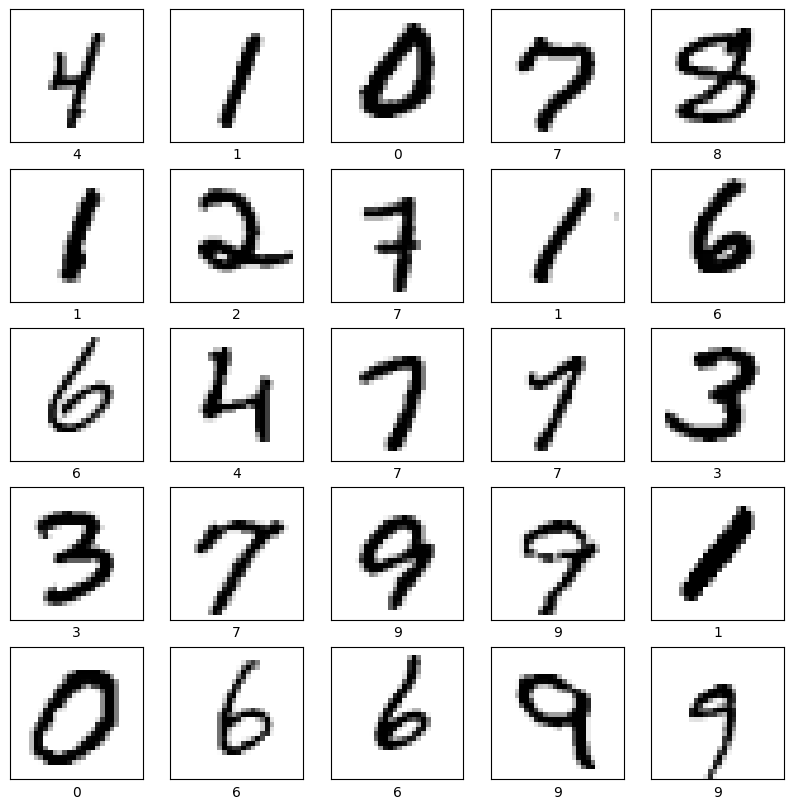

In [3]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime unos numeros :)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(clases[etiqueta])

plt.show()  

In [4]:
#Crear el modelo (Modelo denso, regular, sin redes convolucionales todavia)
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 = blanco y negro
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [5]:
#Los numeros de datos de entrenamiento y pruebas (60k y 10k)
num_datos_entrenamiento = metadatos.splits["train"].num_examples
num_datos_pruebas = metadatos.splits["test"].num_examples

#Trabajar por lotes
TAMANO_LOTE=32

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria
#para que el entrenamiento no se aprenda las cosas en orden
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_datos_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [6]:
#Realizar el entrenamiento
import math

historial = modelo.fit(
    datos_entrenamiento,
    epochs=60,
    steps_per_epoch=math.ceil(num_datos_entrenamiento/TAMANO_LOTE)
)

Epoch 1/60
1875/1875 [==============================] - 11s 2ms/step - loss: 0.2908 - accuracy: 0.9166
Epoch 2/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1310 - accuracy: 0.9615
Epoch 3/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1011 - accuracy: 0.9700
Epoch 4/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0786 - accuracy: 0.9751
Epoch 5/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0669 - accuracy: 0.9793
Epoch 6/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0558 - accuracy: 0.9824
Epoch 7/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0471 - accuracy: 0.9855
Epoch 8/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0414 - accuracy: 0.9864
Epoch 9/60
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0375 - accuracy: 0.9876
Epoch 10/60
1875/1875 [==============================] - 4s 2ms/step - loss: 0.03

In [9]:
#Exportar el modelo en formato h5
modelo.save('numeros.h5')

In [10]:
#El equió es linux 
!ls

numeros.h5  sample_data


In [11]:
#para convertirlo a tensorflow.js, primero debemos instalar la libreria 
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 100.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-decision-forests to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━

In [12]:
#crear carpeta donde se colocaran los archivos resultantes 
!mkdir carpeta_salida

In [13]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras numeros.h5 carpeta_salida

2023-04-26 15:30:39.186343: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-26 15:30:39.186619: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-04-26 15:30:39.186654: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
